**CSIT371 - Advanced Algorithms** <br>
**Problem Set** <br>
Abhyuday Singh <br>
April 29th 2024 <br>

In [1]:
import sys
import random
import time
import matplotlib.pyplot as plt

## Q.1 Implement the 0/1 Knapsack algorithm with Dynamic Programming.

In [2]:
def knapsackdp(p, w, W):
    """
    p - Prices/values array
    w - Weights array
    W - Weight capacity
    """
    n = len(p)
    profitTable = [[0 for x in range(W + 1)] for y in range(n + 1)]

    for i in range(n + 1):
        for j in range(W + 1):
            if i == 0 or j == 0:
                profitTable[i][j] == 0
            elif w[i-1] <= j:
                profitTable[i][j] = max(p[i-1] + profitTable[i-1][j-w[i-1]], profitTable[i-1][j])
            else:
                profitTable[i][j] = profitTable[i-1][j]
    return profitTable[n][W]


In [19]:
profits1 = [1, 2, 5, 6]
weights1 = [2, 3, 4, 5]
cap1 = 8
print(knapsackdp(profits1, weights1, cap1))

8


## Q.2 Take an integer n from the user. Generate a random sequence of n positive integers.


In [4]:
n = int(input("Enter length of sequence: "))
seq = [random.randrange(1, 10000) for x in range(n)]
print(seq)

[7876, 319, 3008, 9174, 1622, 6167, 3431, 5324, 80, 7674]


> Find the longest increasing subsequence using dynamic programming approach. 


In [5]:
def LIS(array):
    n = len(array)
    lisTable = [1]*n
 
    for i in range(1, n):
        for j in range(0, i):
            if array[i] > array[j]:
                lisTable[i] = max(lisTable[i], lisTable[j] + 1)
 
    max_len = max(lisTable)
    max_idx = lisTable.index(max_len)
 
    lis = [array[max_idx]]
    for i in range(max_idx - 1, -1, -1):
        if lisTable[i] == lisTable[max_idx] - 1 and array[i] < array[max_idx]:
            lis.append(array[i])
            max_idx = i
 
    return lis

In [6]:
print("The longest increasing subsequence in the user-generated array is ", LIS(seq))

The longest increasing subsequence in the user-generated array is  [7674, 5324, 3431, 1622, 319]


> Write down the time complexity equation. Express the equation using 'Big O' notation. Plot the time complexity graph up to n = 100

The above approach for finding the Longest Increasing Subsequence has a $for$ loop nested within another $for$ loop, the time complexity of both of which is $O(n)$. <br>
Therefore, total time complexity of the above approach comes to be $O(n^2)$. 

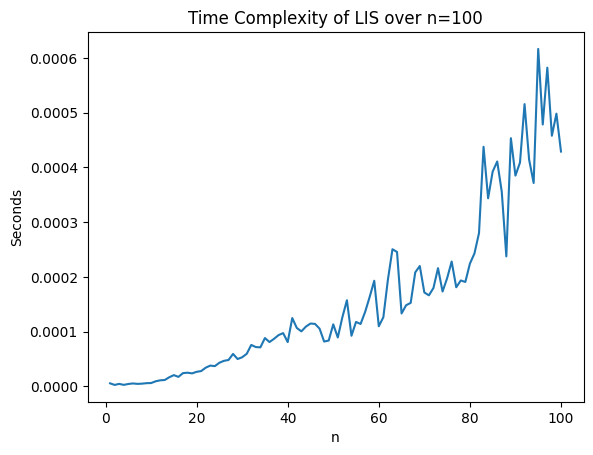

In [7]:
def tn_of_LIS(n):
    seq = [random.randrange(1, 10000) for x in range(n)]
    
    ST = time.perf_counter()
    lis = LIS(seq)
    return time.perf_counter() - ST

graph_range = list(range(1, 101))
LIS_times = []

for x in graph_range:
    LIS_times.append(tn_of_LIS(x)) 

plt.plot(graph_range, LIS_times)
plt.xlabel('n')
plt.ylabel('Seconds')
plt.title('Time Complexity of LIS over n=100')
plt.show()

# Due to arrays fed to LIS() being randomly-generated, rerunning this cell will plot different graphs each time

## Q.3 Implement Radix Sort algorithm with a user-given sequence.


> Write down the time complexity function. Plot the time complexity graph upto n=100.

In [8]:
def countingSort(array, place):
    # As an intermediary sorting technique for the digits at each place, Counting Sort is used
    size = len(array)
    output = [0] * size
    count = [0] * 10

    for i in range(0, size):
        index = array[i] // place
        count[index % 10] += 1

    for i in range(1, 10):
        count[i] += count[i - 1]

    i = size - 1
    while i >= 0:
        index = array[i] // place
        output[count[index % 10] - 1] = array[i]
        count[index % 10] -= 1
        i -= 1

    for i in range(0, size):
        array[i] = output[i]

In [9]:
# Main function to implement radix sort
def radixSort(array):
    max_element = max(array)

    place = 1
    while max_element // place > 0:
        countingSort(array, place)
        place *= 10

In [10]:
radixSort(seq)
print(seq)

[80, 319, 1622, 3008, 3431, 5324, 6167, 7674, 7876, 9174]


**Time Complexity Function** <br>
Let the number of elements in the array to be sorted be $n$, and the maximum number of digits of any element in this array be $d$. Since the algorithm works by sorting every digits place for every number, it makes as many passes over all numbers as there are digits. Therefore, the average time complexity of Radix Sort is $O(nd)$. <br>
In the worst case, where there is one element in the array with significantly more digits than the rest, it can cause the time taken for the algorithm to run to increase greatly. *E.g.*, [1, 2, 3, 4, 1000000, 5, 6] <br>
Radix Sort works best if $d$ is small, regardless of $n$. If $d$ is as large as $n$, the time complexity is effectively $O(n^2)$.

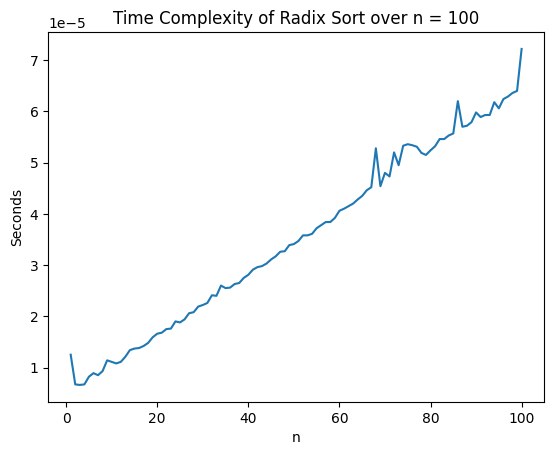

In [11]:
def tn_of_Radix(n):
    seq = [random.randrange(1, 10000) for x in range(n)]

    ST = time.perf_counter()
    radixSort(seq)
    return time.perf_counter() - ST

radix_times = []
for x in graph_range:
    radix_times.append(tn_of_Radix(x))

plt.plot(graph_range, radix_times)
plt.xlabel('n')
plt.ylabel('Seconds')
plt.title('Time Complexity of Radix Sort over n = 100')
plt.show()
    

## Q.4 Implement Counting Sort algorithm with a user-given sequence and range K.


In [12]:
def countingSort(array):
    K = max(array) + 1
    count = [0 for x in range(K)]
    result = [0 for x in range(len(array))]

    for x in array:
        count[x] += 1
    for i in range(1, K):
        count[i] += count[i-1]
    for x in reversed(array):
        result[count[x] - 1] = x
        count[x] -= 1
    return result

In [13]:
cs_test1 = [random.randrange(1, 100) for x in range(10)]
cs_test2 = [random.randrange(1, 1000) for x in range(15)]
print('Raw: ', cs_test1, '\nSorted: ', countingSort(cs_test1))
print('Raw: ', cs_test2, '\nSorted: ', countingSort(cs_test2))

Raw:  [52, 86, 39, 87, 75, 81, 21, 35, 12, 21] 
Sorted:  [12, 21, 21, 35, 39, 52, 75, 81, 86, 87]
Raw:  [184, 645, 201, 13, 734, 528, 686, 666, 265, 518, 922, 300, 418, 925, 722] 
Sorted:  [13, 184, 201, 265, 300, 418, 518, 528, 645, 666, 686, 722, 734, 922, 925]


> Write down the time complexity function. 

To find the maximum element $K$ in the array $n$ operations are needed, therefore it takes $O(n)$ time. Initializing the arrays will then take $O(K)$ time, and then counting elements and building the sorted array take $O(n)$ time each. Therefore, total time complexity of Counting Sort is of the form $O(n + K)$.

> Plot the time complexity graph upto N and K = 100. <br>
> Extract all graphs by fixing K = 10 and varying N from 5 to 100. <br>
> Consider 10 step size of K and increase. Show graphs for fixed N = 100. 

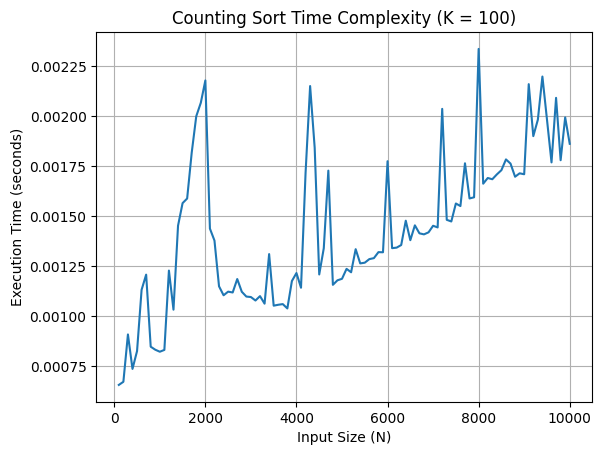

In [14]:
def measure_time(N):
    array = random.sample(range(1, 10001), N)
    start_time = time.perf_counter()
    countingSort(array)
    return time.perf_counter() - start_time

N_range = list(range(100, 10001, 100))
counting_times = [measure_time(N) for N in N_range]

plt.plot(N_range, counting_times)
plt.xlabel('Input Size (N)')
plt.ylabel('Execution Time (seconds)')
plt.title('Counting Sort Time Complexity (K = 100)')
plt.grid(True)
plt.show()

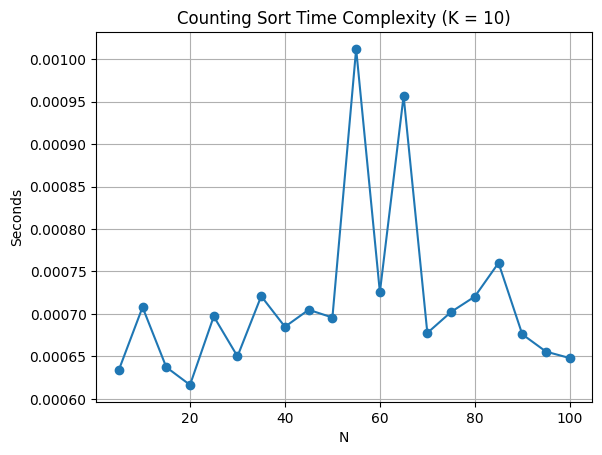

In [15]:
def measure_time(N):
    array = random.sample(range(1, 10001), N)
    start_time = time.perf_counter()
    countingSort(array)
    return time.perf_counter() - start_time

N_range = list(range(5, 101, 5))
avg_times = []

for N in N_range:
    execution_times = [measure_time(N) for _ in range(10)] 
    avg_time = sum(execution_times) / len(execution_times)
    avg_times.append(avg_time)

# Plot the graph
plt.plot(N_range, avg_times, marker='o')
plt.xlabel('N')
plt.ylabel('Seconds')
plt.title('Counting Sort Time Complexity (K = 10)')
plt.grid(True)
plt.show()

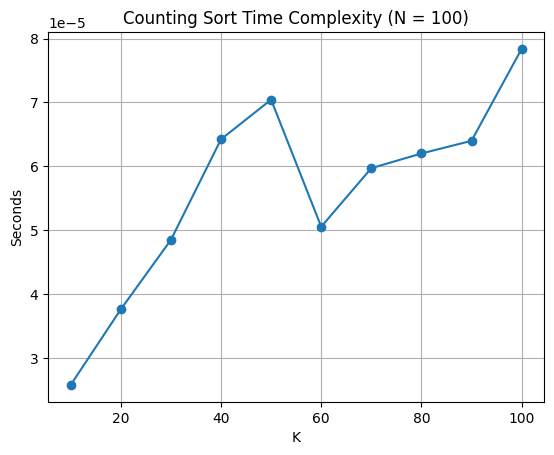

In [16]:
def measure_time(K):
    array = random.sample(range(1, K*10 + 1), 100) 
    start_time = time.perf_counter()
    countingSort(array)
    end_time = time.perf_counter()
    return end_time - start_time

K_values = list(range(10, 101, 10))
avg_execution_times = []

for K in K_values:
    execution_times = [measure_time(K) for _ in range(10)]   
    avg_execution_time = sum(execution_times) / len(execution_times)
    avg_execution_times.append(avg_execution_time)

# Plot the graph
plt.plot(K_values, avg_execution_times, marker='o')
plt.xlabel('K')
plt.ylabel('Seconds')
plt.title('Counting Sort Time Complexity (N = 100)')
plt.grid(True)
plt.show()

## Q.5 Implement Matrix Chain Multiplication using dynamic programming.
> Write down the time complexity function precisely. Then express the time complexity function with 'Big O' notation.

In [17]:
def MCM(p):
    n = len(p)
    table = [[0 for x in range(n)] for y in range(n)]

    for chainlen in range(2, n):
        for i in range(1, n - chainlen + 1):
            j = i + chainlen - 1
            table[i][j] = sys.maxsize
            for k in range(i, j):
                cost = table[i][k] + table[k + 1][j] + p[i - 1] * p[k] * p[j]
                if cost < table[i][j]:
                    table[i][j] = cost
    # To view the table, uncomment following two lines and run
    # for row in table[:-1]:
    #     print(row)
    return table[1][n-1]

In [18]:
mat_test1 = [1, 2, 4, 10]
mat_test2 = [2, 4, 5, 6, 3]
print(str(MCM(mat_test1)))
print(str(MCM(mat_test2)))

48
136


**Time Complexity Function** <br>
Let $n$ be the number of matrices. The program consists of three nested loops: the outermost loop runs from 2 to $n$, giving a time complexity of $O(n)$. The second loop runs from 1 to $n$ - $chainlen + 1$, also giving a time complexity of $O(n)$, and the innermost loop runs till the second loop's current iteration + $chainlen - 1$, again yielding a time complexity of $O(n)$. <br>
The three nested loops, each of $O(n)$, bring the total time complexity of the algorithm to $O(n^3)$.